In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

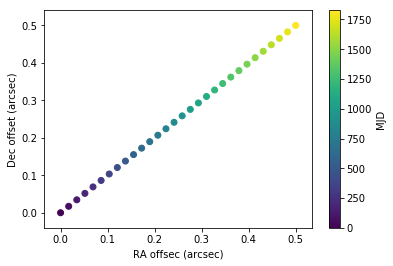

In [2]:
# Let's generate a star position, assuming it starts at ra,dec=0,0, has no parallax, and a 10 mas/yr proper motion
# dates of observation
npts = 30
length = 5.  # years
mjds = np.arange(npts)/(npts-1)*365.25*length
ra = np.sqrt(10./1e3)*mjds/365.25
dec = np.sqrt(10./1e3)*mjds/365.25

plt.scatter(ra, dec, c=mjds)
plt.xlabel('RA offsec (arcsec)')
plt.ylabel('Dec offset (arcsec)')
cb = plt.colorbar()
cb.set_label('MJD')

In [3]:
# As before, errors in the centroiding. 
fwhm = 1.0 
snr = 5.
centroid_error = fwhm/snr  

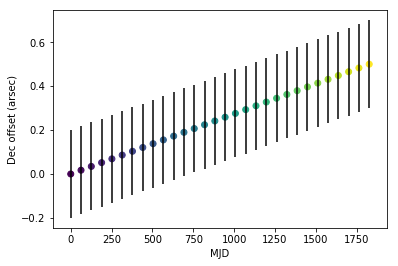

In [4]:
# Now to look at the declination as a function of time
f, ax = plt.subplots(1,1)
ax.errorbar(mjds, dec, yerr=centroid_error, fmt='none', ecolor='k')
ax.scatter(mjds, dec, c=mjds)
ax.set_xlabel('MJD')
ax.set_ylabel('Dec offset (arsec)')

In [5]:
# We have this handy function in MAF, wish I'd put down the link where I found it
def sigma_slope(x, sigma_y):
    """
    Calculate the uncertainty in fitting a line, as
    given by the spread in x values and the uncertainties
    in the y values.

    Parameters
    ----------
    x : numpy.ndarray
        The x values of the data
    sigma_y : numpy.ndarray
        The uncertainty in the y values

    Returns
    -------
    float
        The uncertainty in the line fit
    """
    w = 1./sigma_y**2
    denom = np.sum(w)*np.sum(w*x**2)-np.sum(w*x)**2
    if denom <= 0:
        return np.nan
    else:
        result = np.sqrt(np.sum(w)/denom )
        return result


In [6]:
uncert =sigma_slope(mjds/365.25, mjds*0.+centroid_error)*1000
print('uncertainty in declination proper motion=%.3f mas/yr' % uncert)

uncertainty in declination proper motion=24.469 mas/yr


/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


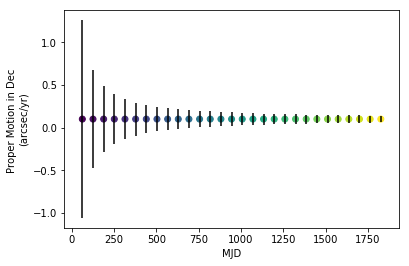

In [7]:
# As a check of that equation, let's suppose we magically know the intercept, so each point can be used as an
# independent measure of the slope
slope = dec/(mjds/365.25)
slope_err = centroid_error/(mjds/365.25)
f, ax = plt.subplots(1,1)
ax.errorbar(mjds, slope, yerr=slope_err, fmt='none', ecolor='k')
ax.scatter(mjds, slope, c=mjds)
ax.set_xlabel('MJD')
ax.set_ylabel('Proper Motion in Dec \n(arcsec/yr)')

In [8]:
final_err = np.sqrt(1./np.sum(1./slope_err**2))*1e3

In [9]:
print('simplified attempt final error=%.3f mas/yr' % final_err)

simplified attempt final error=12.541 mas/yr


Intercept shifted final slope error=24.469 mas/yr


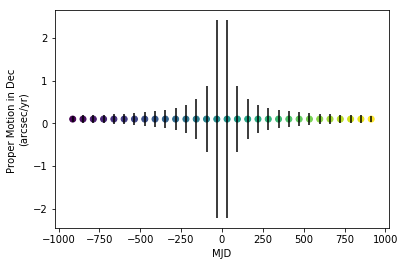

In [10]:
# But note, the best way to eliminate the covariance between the slope and intercept is to shift the data
# so that the intercept is in the middle of the date range, and if we do that:
mjds -= np.mean(mjds)
dec -= np.mean(dec)

slope = dec/(mjds/365.25)
slope_err = centroid_error/(mjds/365.25)
f, ax = plt.subplots(1,1)
ax.errorbar(mjds, slope, yerr=slope_err, fmt='none', ecolor='k')
ax.scatter(mjds, slope, c=mjds)
ax.set_xlabel('MJD')
ax.set_ylabel('Proper Motion in Dec \n(arcsec/yr)')

final_err = np.sqrt(1./np.sum(1./slope_err**2))*1e3
print('Intercept shifted final slope error=%.3f mas/yr' % final_err)

In [11]:
# Which is the same as we got from the function above. So there is some hope that we have the correct equation if we 
# want to eliminate the covariance with intercept.

# Note, the function in cell 5 does not depend on the magnitude of the slope, only the times of observations and 
# the centroid errors on those observations. As long as centroid errors are symetric, then the RA and Dec
# uncertainties should be equal.